# Time Stats and ML
Assignment 8

Samantha Chan\
DATASCI 217\
Fall 2024

## Time Series Tasks

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read in 3 csv files
base_df = pd.read_csv("patient_baseline.csv", sep="\t")
long_df = pd.read_csv("patient_longitudinal.csv", sep="\t")
treat_df = pd.read_csv("patient_treatment.csv", sep="\t")

# format the datetime
long_df['visit_date'] = pd.to_datetime(long_df['visit_date'], format='%Y-%m-%d')


clean_long_df = long_df.groupby(['patient_id', 'visit_date']).mean() # if duplicates, group and use mean as value

# clean duplicates
clean_long_df = clean_long_df.drop_duplicates()

clean_long_df['bp_systolic'] = clean_long_df['bp_systolic'].interpolate(method='linear')
clean_long_df['heart_rate'] = clean_long_df['heart_rate'].interpolate(method='linear')


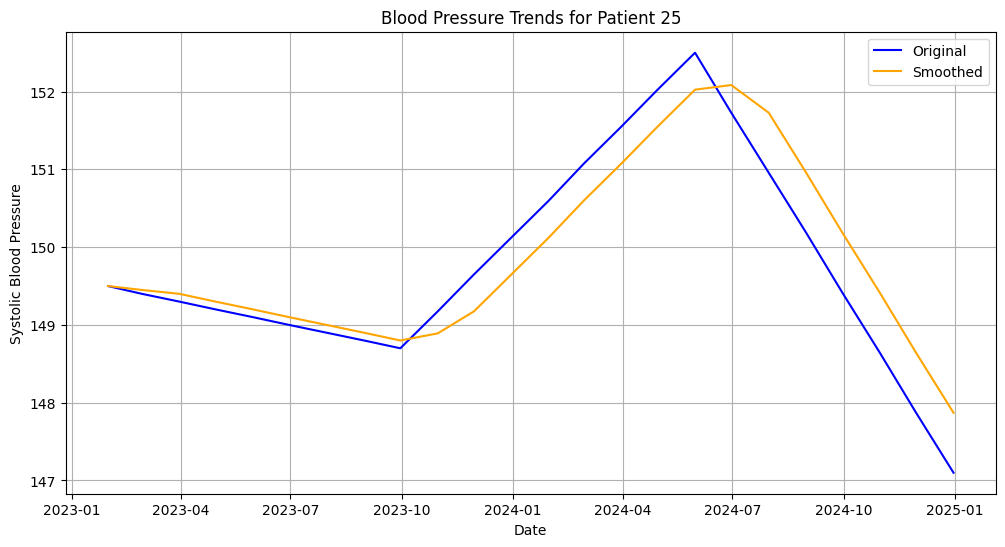

In [20]:
# Example: Selecting a single patient to analyze their blood pressure trend
patient_id = 25
patient_data = clean_long_df.loc[patient_id, 'bp_systolic']

# Resample data to a monthly frequency using mean aggregation
monthly_bp = patient_data.resample('M').mean()

# Fill any missing monthly values using interpolation
monthly_bp = monthly_bp.interpolate(method='linear')

# Calculate 3-month moving average for smoothing
smoothed_bp = monthly_bp.rolling(window=3, min_periods=1).mean()

# Optional: Calculate an exponentially weighted moving average
ewm_bp = monthly_bp.ewm(span=3, adjust=False).mean()

# Plotting the results
plt.figure(figsize=(12, 6))

# Original monthly trend
plt.plot(monthly_bp, label='Original', color='blue')
# Smoothed trend (3-month moving average)
plt.plot(smoothed_bp, label='Smoothed', color='orange')

# Labeling the plot
plt.title(f'Blood Pressure Trends for Patient {patient_id}')
plt.xlabel('Date')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.grid(True)
plt.show()

## Statistical Model Tasks

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          6.36e-100
Time:                        09:42:40   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      1.979     54.812      0.0

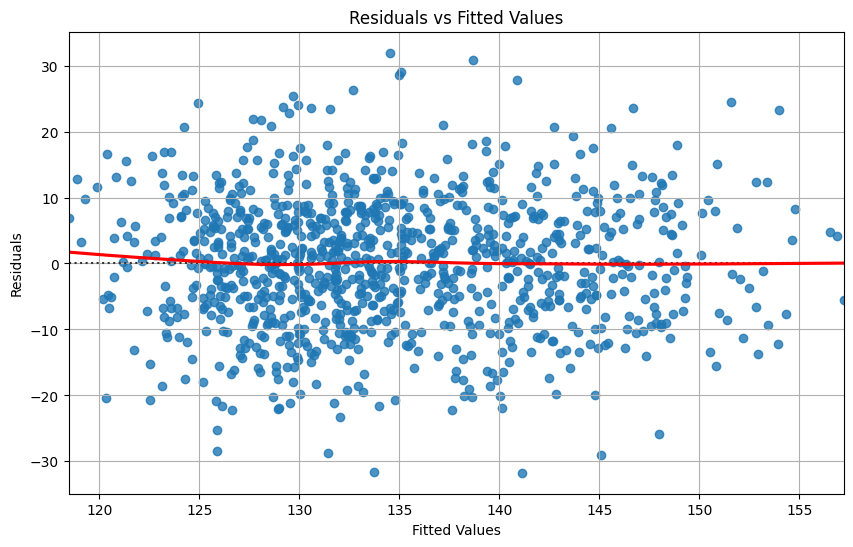

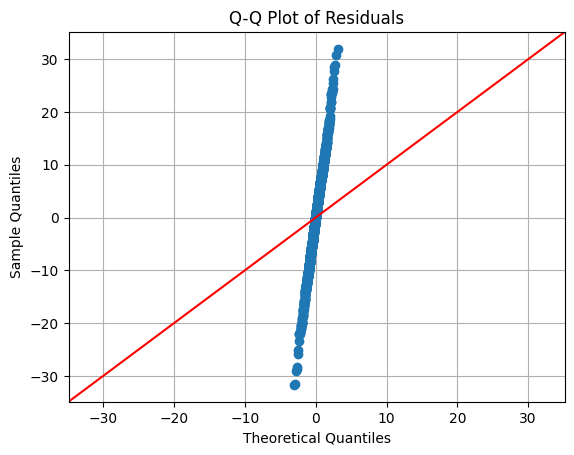

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

base_df = pd.read_csv("patient_baseline.csv", sep="\t") # read in csv

y = base_df['bp_systolic'] # target
X = base_df[['age', 'bmi', 'smoking', 'diabetes']] # predictors

# Add a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit(cov_type='HC3')  # Using robust standard errors (HC3)

print(model.summary()) # print summary

# create figure
plt.figure(figsize=(10, 6))

# residual plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True) # plot the grid lines
plt.show()

# Q-Q plot
sm.qqplot(model.resid, line='45')
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

Our OLS regression has an R-squared value of 0.376. This means that the fit of our model is not good. As illustrated from the residual plot, because the points are randomly scattered, this shows us that a linear regression would be a good choice for our model. The QQ plot tells us that our residuals are normally distributed. In addition, since we have low p-values for age, bmi, smoking, and diabetes, this tells us that it is highly significant. Simiarly, the narrow range in the 95% confidence interval tells us that there is a strong association between the variables and our target variable.